In [60]:
import json
import csv
import sklearn
import tweepy
import re
import nltk
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from pprint import pprint

In [2]:
from textblob import TextBlob
import requests
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

In [3]:
class Analysis:
    def run(self):
        headers = {
            "User-Agent":
            "Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/44.0.2403.157 Safari/537.36"
            }
        #try DBScan
        response = requests.get(self.url, headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')
        headline_results1 = soup.find_all('div', class_='JheGif nDgy9d')
        headline_results = soup.find_all('div', class_='Y3v8qd')
        #open the spreadsheet we will write to
        with open('%s%s.csv' % (self.term,self.start[-4:]), 'a') as file:
            w = csv.writer(file)
            for text1,text in zip(headline_results1,headline_results):
                blob1 = TextBlob(text1.get_text())
                blob = TextBlob(text.get_text())
                w.writerow([blob1+'. '+blob,'%s' % (self.start)])
        sia = SIA()
        results = []

        for text1,text in zip(headline_results1,headline_results):
            blob1 = TextBlob(text1.get_text())
            blob = TextBlob(text.get_text())
            blob_all = blob1+'. '+blob
            pol_score = sia.polarity_scores(str(blob_all))
            pol_score['headline'] = str(blob_all)
            results.append(pol_score)

              #write header row to spreadsheet
        dfr = pd.DataFrame.from_records(results)
        self.sentiment = dfr["compound"].mean()
        print('it is '+str(self.sentiment))
        
    def __init__(self, term,start,end):
        self.term = term
        self.start = start
        self.end = end
        self.sentiment = 0
        self.subjectivity = 0   
        self.url = 'https://www.google.com/search?tbs=cdr%3A1%2Ccd_min%{1}%2Ccd_max%{2}&q={0}&source=lnms&tbm=nws'.format(self.term,self.start,self.end)


In [4]:
ConservativeSentiment2019 = 0
for x in range(6,12):
    a = Analysis('Conservative party','3A'+str(x)+'%2F09%2F2019','3A'+str(x+1)+'%2F10%2F2019')
    a.run()
    ConservativeSentiment2019 += a.sentiment
ConservativeSentiment2017 = 0
for x in range(1,7):
    a = Analysis('Conservative party','3A'+str(x)+'%2F06%2F2017','3A'+str(x+1)+'%2F07%2F2017')
    a.run()
    ConservativeSentiment2017 += a.sentiment
    
ConservativeSentiment2015 = 0
a = Analysis('Conservative party','3A12%2F05%2F2014','3A12%2F06%2F2014')
a.run()
ConservativeSentiment2015 += a.sentiment
for x in [1,2,3,4,5]:
    a = Analysis('Conservative party','3A'+str(x)+'%2F05%2F2015','3A'+str(x+1)+'%2F06%2F2015')
    a.run()
    ConservativeSentiment2015 += a.sentiment
    
    
ConservativeSentiment2010 = 0
a = Analysis('Conservative party','3A12%2F04%2F2009','3A12%2F05%2F2009')
a.run()
#print(a.term, 'Subjectivity', a.subjectivity, 'Sentiment', a.sentiment)
ConservativeSentiment2010 += a.sentiment
for x in [1,2,3,4,5]:
    a = Analysis('Conservative party','3A'+str(x)+'%2F04%2F2010','3A'+str(x+1)+'%2F05%2F2010')
    a.run()
    ConservativeSentiment2010 += a.sentiment
    
ConservativeSentiment2005 = 0
a = Analysis('Conservative party','3A12%2F03%2F2004','3A12%2F04%2F2004')
a.run()
ConservativeSentiment2005 += a.sentiment
for x in [1,2,3,4,5]:
    a = Analysis('Conservative party','3A'+str(x)+'%2F03%2F2005','3A'+str(x+1)+'%2F04%2F2005')
    a.run()
    ConservativeSentiment2005 += a.sentiment

it is 0.55515
it is 0.51288
it is 0.15036999999999998
it is 0.21576
it is 0.4958699999999999
it is 0.5799399999999999
it is 0.44250000000000006
it is 0.4485499999999999
it is 0.21055000000000001
it is 0.39382
it is 0.48816
it is 0.50939
it is 0.044319999999999984
it is 0.45077999999999996
it is 0.24664999999999998
it is 0.5216799999999999
it is 0.19678
it is 0.39731000000000005
it is 0.22166999999999998
it is 0.18059000000000003
it is 0.26247
it is 0.15562000000000004
it is 0.50934
it is 0.39618000000000003
it is 0.4019
it is -0.039220000000000005
it is 0.34734
it is 0.44315999999999994
it is 0.14504999999999998
it is 0.17236


In [5]:
LabourSentiment2019 = 0
for x in range(6,12):
    a = Analysis('Labour party','3A'+str(x)+'%2F09%2F2019','3A'+str(x+1)+'%2F10%2F2019')
    a.run()
    LabourSentiment2019 += a.sentiment
LabourSentiment2017 = 0
for x in range(1,7):
    a = Analysis('Labour party','3A'+str(x)+'%2F06%2F2017','3A'+str(x+1)+'%2F07%2F2017')
    a.run()
    LabourSentiment2017 += a.sentiment
    
LabourSentiment2015 = 0
a = Analysis('Labour party','3A12%2F05%2F2014','3A12%2F06%2F2014')
a.run()
LabourSentiment2015 += a.sentiment
for x in [1,2,3,4,5]:
    a = Analysis('Labour party','3A'+str(x)+'%2F05%2F2015','3A'+str(x+1)+'%2F06%2F2015')
    a.run()
    LabourSentiment2015 += a.sentiment
    
LabourSentiment2010 = 0
a = Analysis('Labour party','3A12%2F04%2F2009','3A12%2F05%2F2009')
a.run()
LabourSentiment2010 += a.sentiment
for x in [1,2,3,4,5]:
    a = Analysis('Labour party','3A'+str(x)+'%2F04%2F2010','3A'+str(x+1)+'%2F05%2F2010')
    a.run()
    LabourSentiment2010 += a.sentiment
    
LabourSentiment2005 = 0
a = Analysis('Labour party','3A12%2F03%2F2004','3A12%2F04%2F2004')
a.run()
LabourSentiment2005 += a.sentiment
for x in [1,2,3,4,5]:
    a = Analysis('Labour party','3A'+str(x)+'%2F03%2F2005','3A'+str(x+1)+'%2F04%2F2005')
    a.run()
    LabourSentiment2005 += a.sentiment

it is 0.09703999999999999
it is 0.23125999999999997
it is 0.22416
it is 0.20069999999999996
it is 0.23715999999999998
it is 0.46304999999999996
it is 0.41547999999999996
it is 0.07072999999999999
it is 0.02607
it is 0.37682000000000004
it is 0.20850999999999997
it is 0.68956
it is 0.03133999999999998
it is 0.45106
it is 0.27215
it is -0.00970000000000002
it is 0.34140000000000004
it is 0.09387999999999999
it is 0.31611
it is 0.10923000000000002
it is 0.10168999999999997
it is 0.15580999999999998
it is 0.26383999999999996
it is 0.17012999999999998
it is -0.26755000000000007
it is -0.08277000000000001
it is 0.12941
it is 0.01652999999999998
it is 0.19660999999999998
it is 0.38726


In [6]:
BorisJohnsonSentiment2019 = 0
for x in range(6,12):
    a = Analysis('Boris Johnson','3A'+str(x)+'%2F09%2F2019','3A'+str(x+1)+'%2F10%2F2019')
    a.run()
    BorisJohnsonSentiment2019 += a.sentiment
TheresaMaySentiment2017 = 0
for x in range(1,7):
    a = Analysis('Theresa May','3A'+str(x)+'%2F06%2F2017','3A'+str(x+1)+'%2F07%2F2017')
    a.run()
    TheresaMaySentiment2017 += a.sentiment
    
DavidCameronSentiment2015 = 0
a = Analysis('David Cameron','3A12%2F05%2F2014','3A12%2F06%2F2014')
a.run()
DavidCameronSentiment2015 += a.sentiment
for x in [1,2,3,4,5]:
    a = Analysis('David Cameron','3A'+str(x)+'%2F05%2F2015','3A'+str(x+1)+'%2F06%2F2015')
    a.run()
    DavidCameronSentiment2015 += a.sentiment
    
DavidCameronSentiment2010 = 0
a = Analysis('David Cameron','3A12%2F04%2F2009','3A12%2F05%2F2009')
a.run()
DavidCameronSentiment2010 += a.sentiment
for x in [1,2,3,4,5]:
    a = Analysis('David Cameron','3A'+str(x)+'%2F04%2F2010','3A'+str(x+1)+'%2F05%2F2010')
    a.run()
    DavidCameronSentiment2010 += a.sentiment
    
MichaelHowardSentiment2005 = 0
a = Analysis('Michael Howard','3A12%2F03%2F2004','3A12%2F04%2F2004')
a.run()
MichaelHowardSentiment2005 += a.sentiment
for x in [1,2,3,4,5]:
    a = Analysis('Michael Howard','3A'+str(x)+'%2F03%2F2005','3A'+str(x+1)+'%2F04%2F2005')
    a.run()
    MichaelHowardSentiment2005 += a.sentiment

it is 0.19979999999999998
it is 0.0011600000000000165
it is -0.37565
it is 0.10421999999999998
it is -0.22825
it is -0.4549999999999999
it is 0.29664999999999997
it is 0.05408
it is 0.012050000000000005
it is -0.21058000000000004
it is 0.10246
it is -0.008219999999999983
it is -0.08259999999999998
it is -0.29845
it is -0.2625
it is -0.03631
it is 0.14925000000000002
it is 0.24868
it is 0.020940000000000004
it is -0.016709999999999982
it is -0.08674000000000001
it is 0.36008
it is 0.12094
it is 0.10927
it is 0.39289999999999997
it is -0.24377000000000004
it is -0.1069
it is -0.04539
it is -0.14758000000000002
it is 0.23992


In [7]:
JeremyCorbynSentiment2019= 0
for x in range(6,12):
    a = Analysis('Jeremy Corbyn','3A'+str(x)+'%2F09%2F2019','3A'+str(x+1)+'%2F10%2F2019')
    a.run()
    JeremyCorbynSentiment2019 += a.sentiment
JeremyCorbynSentiment2017 = 0
for x in range(1,7):
    a = Analysis('Jeremy Corbyn','3A'+str(x)+'%2F06%2F2017','3A'+str(x+1)+'%2F07%2F2017')
    a.run()
    JeremyCorbynSentiment2017 += a.sentiment
    
EdMilibandSentiment2015 = 0
a = Analysis('Ed Miliband','3A12%2F05%2F2014','3A12%2F06%2F2014')
a.run()
EdMilibandSentiment2015 += a.sentiment
for x in [1,2,3,4,5]:
    a = Analysis('Ed Miliband','3A'+str(x)+'%2F05%2F2015','3A'+str(x+1)+'%2F06%2F2015')
    a.run()
    EdMilibandSentiment2015 += a.sentiment
    
GordonBrownSentiment2010 = 0
a = Analysis('Gordon Brown','3A12%2F04%2F2009','3A12%2F05%2F2009')
a.run()
print(a.term, 'Subjectivity', a.subjectivity, 'Sentiment', a.sentiment)
GordonBrownSentiment2010 += a.sentiment
for x in [1,2,3,4,5]:
    a = Analysis('Gordon Brown','3A'+str(x)+'%2F04%2F2010','3A'+str(x+1)+'%2F05%2F2010')
    a.run()
    GordonBrownSentiment2010 += a.sentiment
    
TonyBlairSentiment2005 = 0
a = Analysis('Tony Blair','3A12%2F03%2F2004','3A12%2F04%2F2004')
a.run()
print(a.term, 'Subjectivity', a.subjectivity, 'Sentiment', a.sentiment)
TonyBlairSentiment2005 += a.sentiment
for x in [1,2,3,4,5]:
    a = Analysis('Tony Blair','3A'+str(x)+'%2F03%2F2005','3A'+str(x+1)+'%2F04%2F2005')
    a.run()
    TonyBlairSentiment2005 += a.sentiment

it is 0.21145999999999998
it is 0.02463000000000002
it is -0.33879000000000004
it is 0.26772999999999997
it is 0.09146000000000001
it is -0.07113
it is 0.13702
it is 0.048639999999999996
it is -0.16036999999999998
it is 0.06305999999999999
it is -0.26471
it is 0.08430999999999998
it is 0.03879999999999998
it is -0.08041999999999999
it is 0.18960000000000002
it is -0.16262
it is 0.5837
it is -0.07178000000000001
it is -0.08910999999999998
Gordon Brown Subjectivity 0 Sentiment -0.08910999999999998
it is -0.15484
it is -0.3063
it is -0.41683000000000003
it is -0.11929999999999999
it is 0.08131
it is 0.4019
Tony Blair Subjectivity 0 Sentiment 0.4019
it is -0.10905000000000001
it is -0.10289999999999999
it is 0.14343999999999998
it is 0.07423000000000003
it is 0.13455000000000003


In [8]:
!pip install geopandas
!pip install descartes
!pip install rfpimp

In [55]:
import geopandas
import descartes
from descartes import PolygonPatch
from sklearn import preprocessing
# import matplotlib as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import random
import matplotlib.colors
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
from sklearn.preprocessing import label_binarize
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression as OLS
from pandas_ml import ConfusionMatrix
%matplotlib inline

In [10]:
year = "2015"
previous_year = "2017"

In [11]:
#Reading in the UK Map File
ukmap = geopandas.read_file('map.json')

In [12]:
#Reading in the Constituency Data from CSV.
#The CSV was compiled from House of Commons Data
df = pd.read_csv("ConstituencyDataEngland.csv", sep=",", header=None)

#Reading in the Brexit vote data from CSV
brexit = pd.read_csv("Brexit.csv", sep=",", header=None)

In [13]:
#Merging the Brexit and Constituency Data
df = pd.merge(df, brexit, on=0)

#Setting column names
df = df.rename(columns={"1_y": "Brexit", 0: "Constituencies", "1_x": "HousePrices", 2: "Wage",3: "British",4: "Tenure",5: "School Grades", 6:"0-9",7:"10-19",8:"20-29",9:"30-39",10:"40-49",11:"50-59",12:"60-69",13:"70-79",14:"80+",15:"Voted Leave"})
df = df[0:] #take the data less the header row
df_2019 = df.copy()
df_2017 = df.copy()
df_2015 = df.copy()
df_2010 = df.copy()
df_2005 = df.copy()
#Removing Constituency Column in prep for clustering
unscaled = df.drop(columns="Constituencies")

#Scaling the data so all attributes are weighted equally

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(unscaled.values)
scaled_values = pd.DataFrame(x_scaled)
mat = scaled_values.values

In [14]:
ukmap = ukmap.rename(columns={'PCON13NM': "Constituencies"})
if year == '2019':
    df_year = df_2019
elif year == '2017':
        df_year = df_2017
elif year == '2015':
        df_year = df_2015
elif year == '2010':
        df_year = df_2010
elif year == '2005':
        df_year = df_2005

In [15]:
#Adding Sentiment
df_2019['Labour Sentiment']= LabourSentiment2019/6
df_2019['Conservative Sentiment'] = ConservativeSentiment2019/6
df_2019['Conservative Leader Sentiment'] = BorisJohnsonSentiment2019/6
df_2019['Labour Leader Sentiment'] = JeremyCorbynSentiment2019/6
df_2019['Year']= 2019

df_2017['Labour Sentiment']= LabourSentiment2017/6
df_2017['Conservative Sentiment'] = ConservativeSentiment2017/6
df_2017['Conservative Leader Sentiment'] = TheresaMaySentiment2017/6
df_2017['Labour Leader Sentiment'] = JeremyCorbynSentiment2017/6
df_2017['Year']= 2017

df_2015['Labour Sentiment']= LabourSentiment2015/6
df_2015['Conservative Sentiment'] = ConservativeSentiment2015/6
df_2015['Conservative Leader Sentiment'] = DavidCameronSentiment2015/6
df_2015['Labour Leader Sentiment'] = EdMilibandSentiment2015/6
df_2015['Year']= 2015

df_2010['Labour Sentiment']= LabourSentiment2010/6
df_2010['Conservative Sentiment'] = ConservativeSentiment2010/6
df_2010['Conservative Leader Sentiment'] = DavidCameronSentiment2010/6
df_2010['Labour Leader Sentiment'] = GordonBrownSentiment2010/6
df_2010['Year']= 2010

df_2005['Labour Sentiment']= LabourSentiment2005/6
df_2005['Conservative Sentiment'] = ConservativeSentiment2005/6
df_2005['Conservative Leader Sentiment'] = MichaelHowardSentiment2005/6
df_2005['Labour Leader Sentiment'] = TonyBlairSentiment2005/6
df_2005['Year']= 2005

In [16]:
results2017 = pd.read_csv("2017Results.csv", sep=",", header=None)
results2017 = results2017.rename(columns={0: "Constituencies", 1: "Party"})

results2019 = pd.read_csv("2019Results.csv", sep=",", header=None)
results2019 = results2019.rename(columns={0: "Constituencies", 1: "Party"})

results2015 = pd.read_csv("2015Results.csv", sep=",", header=None)
results2015 = results2015.rename(columns={0: "Constituencies", 1: "Party"})

results2010 = pd.read_csv("2010Results.csv", sep=",", header=None)
results2010 = results2010.rename(columns={0: "Constituencies", 1: "Party"})

results2005 = pd.read_csv("2005Results.csv", sep=",", header=None)
results2005 = results2005.rename(columns={0: "Constituencies", 1: "Party"})

df_2017 = pd.merge(df_2017, results2017, on="Constituencies")
df_2019 = pd.merge(df_2019, results2019, on="Constituencies")
df_2015 = pd.merge(df_2015, results2015, on="Constituencies")
df_2010 = pd.merge(df_2010, results2010, on="Constituencies")
df_2005 = pd.merge(df_2005, results2005, on="Constituencies")

pd.set_option('display.max_rows', None)

df_2017 = df_2017.rename(columns={"Party": "result"})
df_2019 = df_2019.rename(columns={"Party": "result"})
df_2015 = df_2015.rename(columns={"Party": "result"})
df_2010 = df_2010.rename(columns={"Party": "result"})
df_2005 = df_2005.rename(columns={"Party": "result"})

In [17]:
#Renaming map column so it can be merged with original dataframe
ukmap = ukmap.rename(columns={'PCON13NM': "Constituencies"})

#creating master dataframe containing all clustering information, geographic information and column headers. 
df_2y = df_2017.append(df_2019, ignore_index=True)
df_2y = df_2y.append(df_2015, ignore_index=True)
df_2y = df_2y.append(df_2010, ignore_index=True)
df_2y = df_2y.append(df_2005, ignore_index=True)

master = pd.merge(ukmap, df_2y, on="Constituencies")
master2 = pd.merge(ukmap, df_year, on="Constituencies")


In [18]:
master["result"].replace({'Grn':'Green', 'Spk':'Spkr'}, inplace=True)

In [19]:
master = master[(master.result !='Green' )&(master.result !='KHHC' )&
                (master.result !='Resp' )&(master.result !='Spkr' )&(master.result !='UKIP' )]


In [20]:
le = preprocessing.LabelEncoder()

master['result'] = le.fit_transform(master.result.values)


In [21]:

le.inverse_transform([0,1,2])

array(['Con', 'LD', 'Lab'], dtype=object)

In [22]:
master = master.reset_index(drop=True)


In [23]:

train1 = master.copy()
train_ys1 = train1['result']

#Removing unnecessary columns from the training X data

train1 = train1.drop(columns=['id', 'PCON13CD', 'PCON13CDO', 'Constituencies', 'geometry', 'result','Year'])

In [24]:


cv = KFold(n_splits=10, random_state=None, shuffle=False)

Accuracy for Split 1
0.8408163265306122
Confusion Matric for Split 1
Predicted    0  1    2  __all__
Actual                         
0           97  4   12      113
1            2  1    4        7
2           14  3  108      125
__all__    113  8  124      245
Precision, Recall, F Score for Split 1
(0.6181249405271672, 0.6217547408343869, 0.6197367641658077, None)


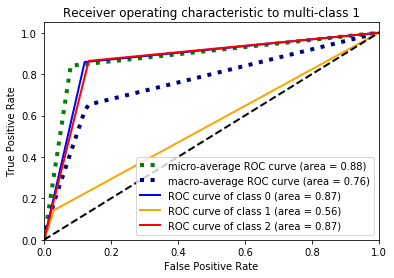

Accuracy for Split 2
0.7704918032786885
Confusion Matric for Split 2
Predicted    0  1   2  __all__
Actual                        
0          122  5  25      152
1            9  0   8       17
2            9  0  66       75
__all__    140  5  99      244
Precision, Recall, F Score for Split 2
(0.5126984126984127, 0.5608771929824562, 0.5314123760037789, None)


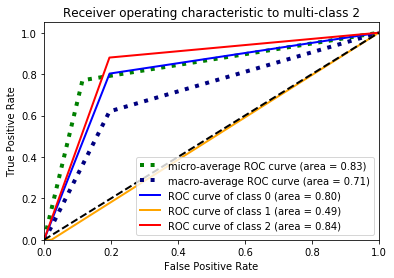

Accuracy for Split 3
0.7377049180327869
Confusion Matric for Split 3
Predicted    0  1    2  __all__
Actual                         
0           85  4   27      116
1            6  0    0        6
2           25  2   95      122
__all__    116  6  122      244
Precision, Recall, F Score for Split 3
(0.503815715093273, 0.503815715093273, 0.5038157150932729, None)


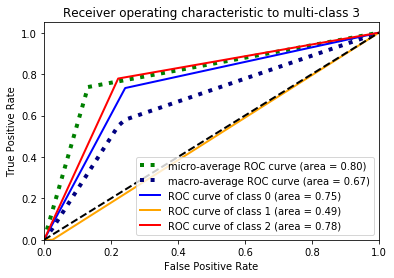

Accuracy for Split 4
0.8073770491803278
Confusion Matric for Split 4
Predicted    0  1   2  __all__
Actual                        
0          120  3  17      140
1            3  0   0        3
2           18  6  77      101
__all__    141  9  94      244
Precision, Recall, F Score for Split 4
(0.5567375886524822, 0.5398396982555398, 0.5479453721446604, None)


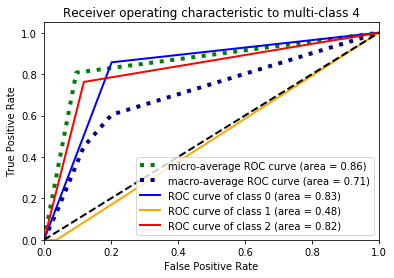

Accuracy for Split 5
0.7991803278688525
Confusion Matric for Split 5
Predicted    0  1    2  __all__
Actual                         
0           85  1    6       92
1            6  1    4       11
2           29  3  109      141
__all__    120  5  119      244
Precision, Recall, F Score for Split 5
(0.6080999066293185, 0.5959572599258075, 0.5884494436381229, None)


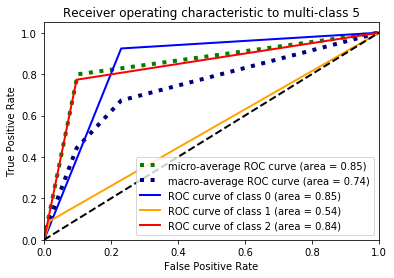

Accuracy for Split 6
0.8073770491803278
Confusion Matric for Split 6
Predicted    0  1   2  __all__
Actual                        
0          136  3  18      157
1            3  3   0        6
2           23  0  58       81
__all__    162  6  76      244
Precision, Recall, F Score for Split 6
(0.7008880225254495, 0.6940971403108699, 0.6971726933290737, None)


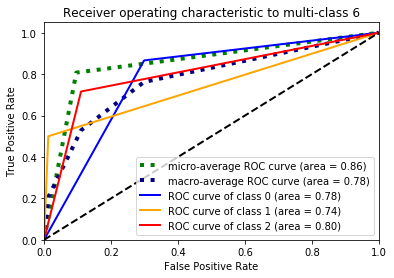

Accuracy for Split 7
0.8114754098360656
Confusion Matric for Split 7
Predicted    0  1    2  __all__
Actual                         
0          126  1   30      157
1            3  2    5       10
2            7  0   70       77
__all__    136  3  105      244
Precision, Recall, F Score for Split 7
(0.7532679738562091, 0.6372128932638487, 0.6456637787695808, None)


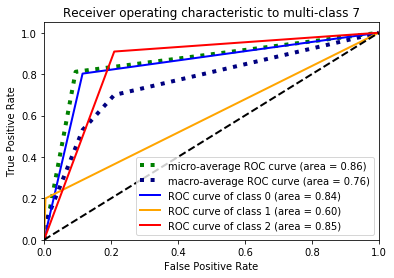

Accuracy for Split 8
0.8032786885245902
Confusion Matric for Split 8
Predicted    0   1   2  __all__
Actual                         
0          152   7  20      179
1            5   0   3        8
2           10   3  44       57
__all__    167  10  67      244
Precision, Recall, F Score for Split 8
(0.5222986862096702, 0.5403639452448626, 0.5294300453726147, None)


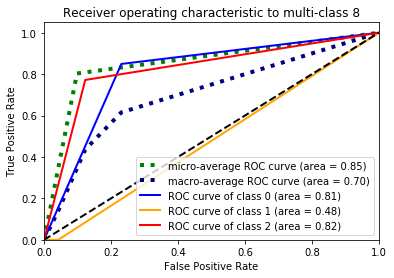

Accuracy for Split 9
0.8032786885245902
Confusion Matric for Split 9
Predicted    0   1   2  __all__
Actual                         
0          126   6  13      145
1            8   3   3       14
2           10   8  67       85
__all__    144  17  83      244
Precision, Recall, F Score for Split 9
(0.6195665012993149, 0.6238288418815802, 0.6210465843516406, None)


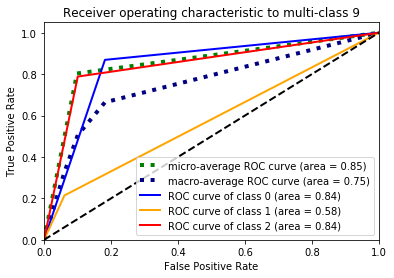

Accuracy for Split 10
0.7377049180327869
Confusion Matric for Split 10
Predicted    0  1   2  __all__
Actual                        
0          103  5  18      126
1            9  0   0        9
2           31  1  77      109
__all__    143  6  95      244
Precision, Recall, F Score for Split 10
(0.5102686786897314, 0.5079607786029804, 0.5069004057632966, None)


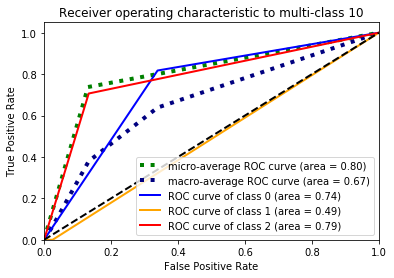

Accuracy =0.7918685178989627
Precision =0.5905766426181028
Recall =0.5825708206395604
F1 Score =0.5791573178631849
ROC AUC Score =0.671005672789089


In [77]:
toprow = ["Random", "Med. House Price", "Med. Wage", "Prop. British", "Tenure", "Grades", "0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+", "Brexit",
          "Labour Sentiment","Conservative Sentiment","Conservative Leader Sentiment","Labour Leader Sentiment","result2017"]
toprow= list(train1.columns.values)
scores=[]
precisions=[]
recalls=[]
fscores=[]
p=1
DTC1 = tree.DecisionTreeClassifier()
for train_index, test_index in cv.split(train1):
    X_train, X_test = train1.reindex(train_index), train1.reindex(test_index)
    y_train, y_test = train_ys1.reindex(train_index), train_ys1.reindex(test_index).reset_index(drop=True)
    DTC1.fit(X_train, y_train)
    print('Accuracy for Split '+ str(p))
    print(DTC1.score(X_test, y_test))
    scores.append(DTC1.score(X_test, y_test))
    pred = DTC1.predict(X_test)
    print('Confusion Matric for Split '+ str(p))
    print(ConfusionMatrix(y_test, pred))
    print('Precision, Recall, F1 Score for Split '+str(p))
    print(precision_recall_fscore_support(y_test, pred, average='macro'))
    precision,recall,fscore,support=precision_recall_fscore_support(y_test, pred, average='macro')
    precisions.append(precision)
    recalls.append(recall)
    fscores.append(fscore)
    
    predbin = label_binarize(pred,classes=[0,1,2,])
    y_testbin = label_binarize(y_test,classes=[0,1,2,])
    n_classes = predbin.shape[1]
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_testbin[:, i], predbin[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    fpr["micro"], tpr["micro"], _ = roc_curve(y_testbin.ravel(), predbin.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='green', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    colors = cycle(['blue', 'orange', 'red'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color,  linewidth=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--',  linewidth=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic to multi-class '+str(p))
    p+=1
    plt.legend(loc="lower right")
    plt.show()
acc = np.mean(scores)
print('Accuracy ='+ str(acc))
precisionavg = np.mean(precisions)
print('Precision ='+ str(precisionavg))
recallavg = np.mean(recalls)
print('Recall ='+ str(recallavg))
fscoreavg = np.mean(fscores)
print('F1 Score ='+ str(fscoreavg))
print('ROC AUC Score ='+ str(roc_auc["macro"]))


Accuracy for Split 1
0.889795918367347
Confusion Matric for Split 1
Predicted    0  1    2  __all__
Actual                         
0          100  0   13      113
1            4  0    3        7
2            7  0  118      125
__all__    111  0  134      245
Precision, Recall, F Score for Split 1
(0.8648017496631569, 0.889795918367347, 0.8767039634386573, None)


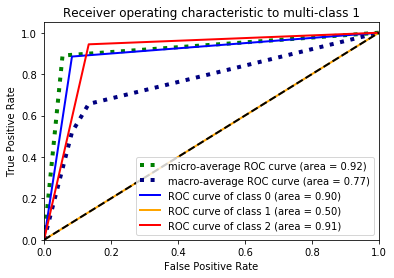

Accuracy for Split 2
0.8401639344262295
Confusion Matric for Split 2
Predicted    0  1   2  __all__
Actual                        
0          139  2  11      152
1            8  0   9       17
2            9  0  66       75
__all__    156  2  86      244
Precision, Recall, F Score for Split 2
(0.7909591679130376, 0.8401639344262295, 0.8142847886254873, None)


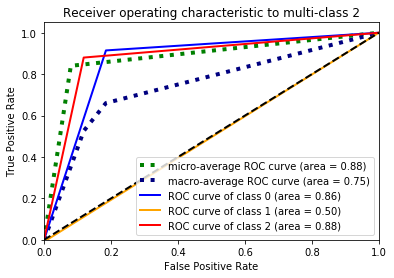

Accuracy for Split 3
0.7909836065573771
Confusion Matric for Split 3
Predicted    0  1    2  __all__
Actual                         
0           93  3   20      116
1            5  0    1        6
2           22  0  100      122
__all__    120  3  121      244
Precision, Recall, F Score for Split 3
(0.7816657634466875, 0.7909836065573771, 0.7862100469151811, None)


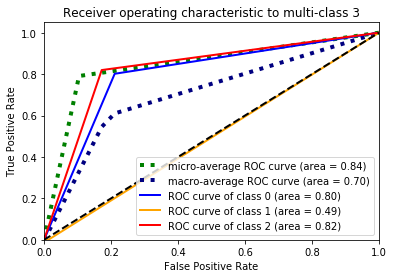

Accuracy for Split 4
0.8852459016393442
Confusion Matric for Split 4
Predicted    0  1   2  __all__
Actual                        
0          131  0   9      140
1            3  0   0        3
2           16  0  85      101
__all__    150  0  94      244
Precision, Recall, F Score for Split 4
(0.875395302871759, 0.8852459016393442, 0.8792378716064414, None)


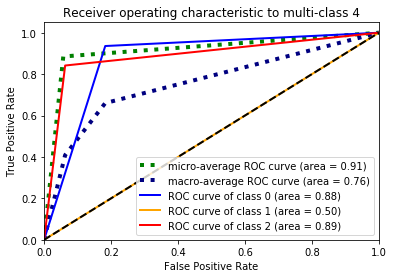

Accuracy for Split 5
0.8688524590163934
Confusion Matric for Split 5
Predicted    0  1    2  __all__
Actual                         
0           84  0    8       92
1            6  1    4       11
2           14  0  127      141
__all__    104  1  139      244
Precision, Recall, F Score for Split 5
(0.8776025837589703, 0.8688524590163934, 0.8549082747853239, None)


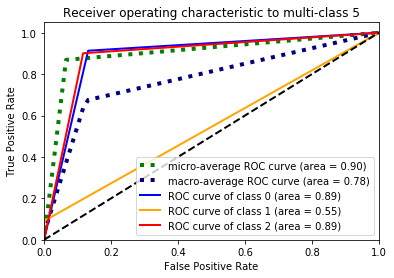

Accuracy for Split 6
0.8688524590163934
Confusion Matric for Split 6
Predicted    0  1   2  __all__
Actual                        
0          143  0  14      157
1            6  0   0        6
2           12  0  69       81
__all__    161  0  83      244
Precision, Recall, F Score for Split 6
(0.8474776818300592, 0.8688524590163934, 0.8580319444549225, None)


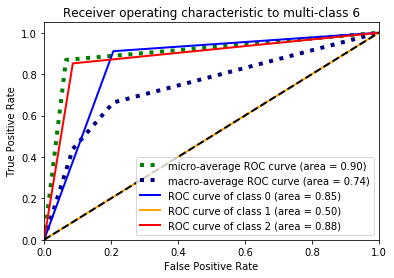

Accuracy for Split 7
0.8442622950819673
Confusion Matric for Split 7
Predicted    0  1    2  __all__
Actual                         
0          131  0   26      157
1            4  1    5       10
2            3  0   74       77
__all__    138  1  105      244
Precision, Recall, F Score for Split 7
(0.874192207175101, 0.8442622950819673, 0.8355362892178674, None)


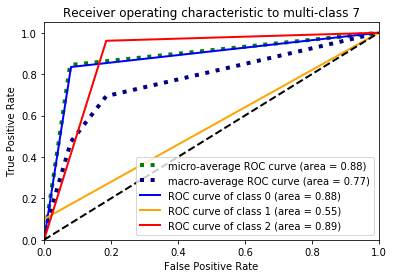

Accuracy for Split 8
0.9057377049180327
Confusion Matric for Split 8
Predicted    0  1   2  __all__
Actual                        
0          173  0   6      179
1            7  0   1        8
2            9  0  48       57
__all__    189  0  55      244
Precision, Recall, F Score for Split 8
(0.8753771122623581, 0.9057377049180327, 0.8899838356582832, None)


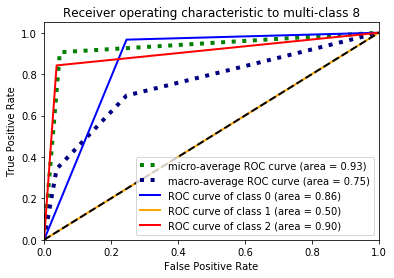

Accuracy for Split 9
0.7950819672131147
Confusion Matric for Split 9
Predicted    0  1   2  __all__
Actual                        
0          128  0  17      145
1           14  0   0       14
2           19  0  66       85
__all__    161  0  83      244
Precision, Recall, F Score for Split 9
(0.7494666579974311, 0.7950819672131147, 0.7708725566729422, None)


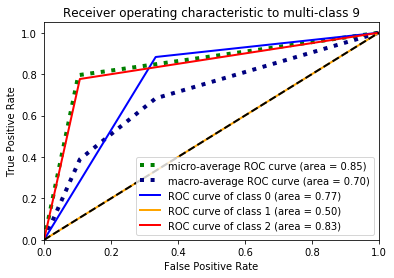

Accuracy for Split 10
0.7991803278688525
Confusion Matric for Split 10
Predicted    0  1   2  __all__
Actual                        
0          114  0  12      126
1            9  0   0        9
2           28  0  81      109
__all__    151  0  93      244
Precision, Recall, F Score for Split 10
(0.7789398019899069, 0.7991803278688525, 0.7833075119667972, None)


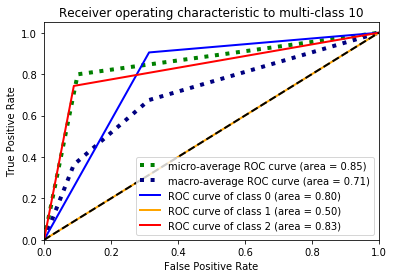

Accuracy =0.8488156574105051
Precision =0.8315878028908468
Recall =0.8488156574105051
F1 Score =0.8349077083341904
ROC AUC Score =0.7075721599823606


In [48]:
scores=[]
precisions=[]
recalls=[]
fscores=[]
p=1
RF1 = RandomForestClassifier(n_estimators=1000)
for train_index, test_index in cv.split(train1):
    X_train, X_test = train1.iloc[train_index], train1.iloc[test_index]
    y_train, y_test = train_ys1.reindex(train_index), train_ys1.reindex(test_index).reset_index(drop=True)
    RF1.fit(X_train, y_train)
    print('Accuracy for Split '+ str(p))
    print(RF1.score(X_test, y_test))
    scores.append(RF1.score(X_test, y_test))
    pred = RF1.predict(X_test)
    print('Confusion Matric for Split '+ str(p))
    print(ConfusionMatrix(y_test, pred))
    print('Precision, Recall, F Score for Split '+str(p))
    print(precision_recall_fscore_support(y_test, pred, average='weighted'))
    precision,recall,fscore,support=precision_recall_fscore_support(y_test, pred, average='weighted')
    precisions.append(precision)
    recalls.append(recall)
    fscores.append(fscore)
    
    predbin = label_binarize(pred,classes=[0,1,2,])
    y_testbin = label_binarize(y_test,classes=[0,1,2,])
    n_classes = predbin.shape[1]
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_testbin[:, i], predbin[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    fpr["micro"], tpr["micro"], _ = roc_curve(y_testbin.ravel(), predbin.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='green', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    colors = cycle(['blue', 'orange', 'red'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color,  linewidth=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic to multi-class '+str(p))
    p+=1
    plt.legend(loc="lower right")
    plt.show()

acc = np.mean(scores)
print('Accuracy ='+ str(acc))
precisionavg = np.mean(precisions)
print('Precision ='+ str(precisionavg))
recallavg = np.mean(recalls)
print('Recall ='+ str(recallavg))
fscoreavg = np.mean(fscores)
print('F1 Score ='+ str(fscoreavg))
print('ROC AUC Score ='+ str(roc_auc["macro"]))


Accuracy for Split 1
0.8285714285714286
Confusion Matric for Split 1
Predicted    0   1    2  __all__
Actual                          
0           89   4   20      113
1            2   3    2        7
2           10   4  111      125
__all__    101  11  133      245
Precision, Recall, F Score for Split 1
(0.8400271698184089, 0.8285714285714286, 0.8321719472401001, None)


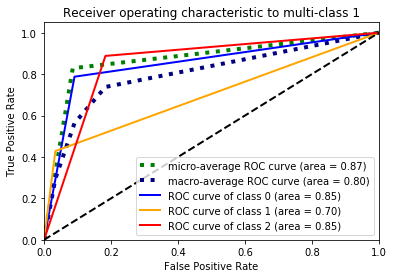

Accuracy for Split 2
0.7868852459016393
Confusion Matric for Split 2
Predicted    0   1   2  __all__
Actual                         
0          133   6  13      152
1            9   3   5       17
2           14   5  56       75
__all__    156  14  74      244
Precision, Recall, F Score for Split 2
(0.7786449077432683, 0.7868852459016393, 0.7825364294243726, None)


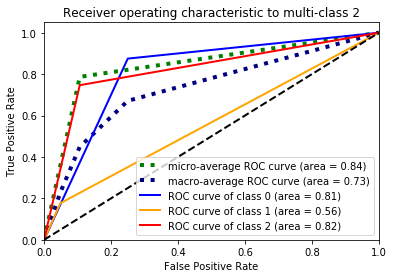

Accuracy for Split 3
0.7827868852459017
Confusion Matric for Split 3
Predicted    0  1    2  __all__
Actual                         
0           97  4   15      116
1            4  1    1        6
2           29  0   93      122
__all__    130  5  109      244
Precision, Recall, F Score for Split 3
(0.7862524150537386, 0.7827868852459017, 0.7819850414812429, None)


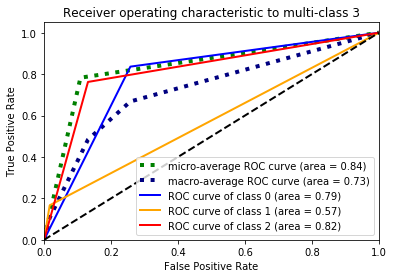

Accuracy for Split 4
0.8360655737704918
Confusion Matric for Split 4
Predicted    0  1   2  __all__
Actual                        
0          126  3  11      140
1            3  0   0        3
2           21  2  78      101
__all__    150  5  89      244
Precision, Recall, F Score for Split 4
(0.8447412046417387, 0.8360655737704918, 0.8384487221445359, None)


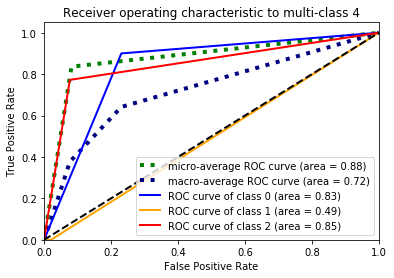

Accuracy for Split 5
0.8114754098360656
Confusion Matric for Split 5
Predicted    0  1    2  __all__
Actual                         
0           77  1   14       92
1            3  3    5       11
2           22  1  118      141
__all__    102  5  137      244
Precision, Recall, F Score for Split 5
(0.8094108027320058, 0.8114754098360656, 0.806777744105206, None)


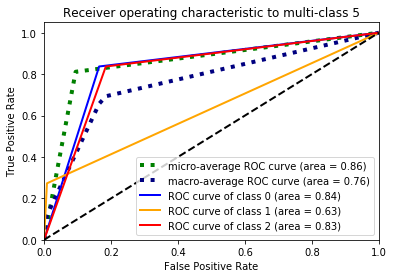

Accuracy for Split 6
0.8975409836065574
Confusion Matric for Split 6
Predicted    0  1   2  __all__
Actual                        
0          149  0   8      157
1            6  0   0        6
2           11  0  70       81
__all__    166  0  78      244
Precision, Recall, F Score for Split 6
(0.8754671903249822, 0.8975409836065574, 0.8859387374205058, None)


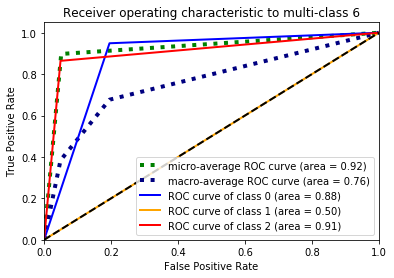

Accuracy for Split 7
0.7459016393442623
Confusion Matric for Split 7
Predicted    0  1    2  __all__
Actual                         
0          109  6   42      157
1            4  1    5       10
2            5  0   72       77
__all__    118  7  119      244
Precision, Recall, F Score for Split 7
(0.7911566821782895, 0.7459016393442623, 0.7467462335157611, None)


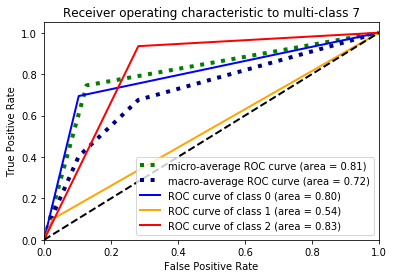

Accuracy for Split 8
0.8483606557377049
Confusion Matric for Split 8
Predicted    0  1   2  __all__
Actual                        
0          162  8   9      179
1            8  0   0        8
2           12  0  45       57
__all__    182  8  54      244
Precision, Recall, F Score for Split 8
(0.8476625833183209, 0.8483606557377049, 0.8478276878213302, None)


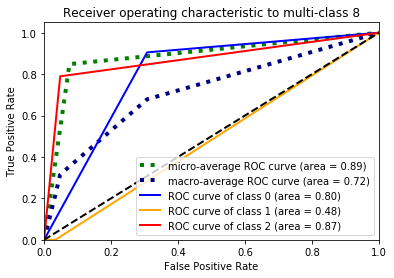

Accuracy for Split 9
0.7540983606557377
Confusion Matric for Split 9
Predicted    0  1   2  __all__
Actual                        
0          113  8  24      145
1           14  0   0       14
2           14  0  71       85
__all__    141  8  95      244
Precision, Recall, F Score for Split 9
(0.7366065145423728, 0.7540983606557377, 0.7444097341638326, None)


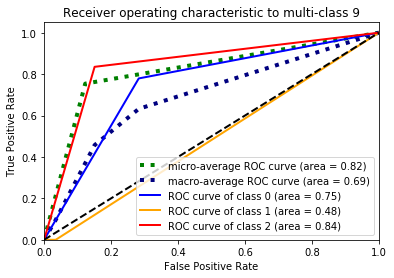

Accuracy for Split 10
0.7663934426229508
Confusion Matric for Split 10
Predicted    0   1   2  __all__
Actual                         
0           98  18  10      126
1            3   6   0        9
2           24   2  83      109
__all__    125  26  93      244
Precision, Recall, F Score for Split 10
(0.8120512006942467, 0.7663934426229508, 0.7829934834363477, None)


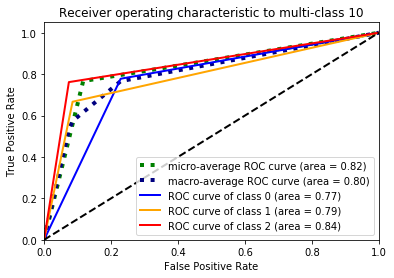

Accuracy =0.805807962529274
Precision =0.8122020671047373
Recall =0.805807962529274
F1 Score =0.8049835760753237
ROC AUC Score =0.8029863863296449


In [51]:
scores=[]
precisions=[]
recalls=[]
fscores=[]
p=1
ada1 = AdaBoostClassifier(n_estimators=100)
for train_index, test_index in cv.split(train1):
    X_train, X_test = train1.iloc[train_index], train1.iloc[test_index]
    y_train, y_test = train_ys1.reindex(train_index), train_ys1.reindex(test_index).reset_index(drop=True)
    ada1.fit(X_train, y_train)
    print('Accuracy for Split '+ str(p))
    print(ada1.score(X_test, y_test))
    scores.append(ada1.score(X_test, y_test))
    pred = ada1.predict(X_test)
    print('Confusion Matric for Split '+ str(p))
    print(ConfusionMatrix(y_test, pred))
    print('Precision, Recall, F Score for Split '+str(p))
    print(precision_recall_fscore_support(y_test, pred, average='weighted'))
    precision,recall,fscore,support=precision_recall_fscore_support(y_test, pred, average='weighted')
    precisions.append(precision)
    recalls.append(recall)
    fscores.append(fscore)
    
    predbin = label_binarize(pred,classes=[0,1,2,])
    y_testbin = label_binarize(y_test,classes=[0,1,2,])
    n_classes = predbin.shape[1]
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_testbin[:, i], predbin[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    fpr["micro"], tpr["micro"], _ = roc_curve(y_testbin.ravel(), predbin.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='green', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    colors = cycle(['blue', 'orange', 'red'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, linewidth=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic to multi-class '+str(p))
    p+=1
    plt.legend(loc="lower right")
    plt.show()

    
acc = np.mean(scores)
print('Accuracy ='+ str(acc))
precisionavg = np.mean(precisions)
print('Precision ='+ str(precisionavg))
recallavg = np.mean(recalls)
print('Recall ='+ str(recallavg))
fscoreavg = np.mean(fscores)
print('F1 Score ='+ str(fscoreavg))
print('ROC AUC Score ='+ str(roc_auc["macro"]))


Accuracy for Split 1
0.4775510204081633
Confusion Matric for Split 1
Predicted    0  1   2  __all__
Actual                        
0          106  0   7      113
1            7  0   0        7
2          114  0  11      125
__all__    227  0  18      245
Precision, Recall, F Score for Split 1
(0.5271649335211325, 0.4775510204081633, 0.36607997044971835, None)


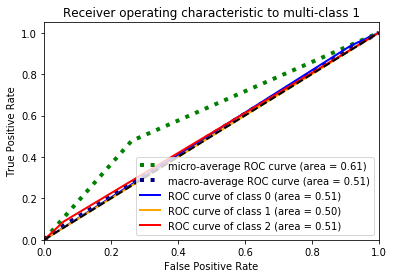

Accuracy for Split 2
0.6352459016393442
Confusion Matric for Split 2
Predicted    0  1   2  __all__
Actual                        
0          148  0   4      152
1           16  0   1       17
2           68  0   7       75
__all__    232  0  12      244
Precision, Recall, F Score for Split 2
(0.5767029395138497, 0.6352459016393442, 0.5296542302619183, None)


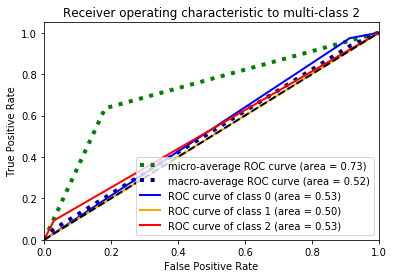

Accuracy for Split 3
0.4959016393442623
Confusion Matric for Split 3
Predicted    0  1  2  __all__
Actual                       
0          115  0  1      116
1            6  0  0        6
2          116  0  6      122
__all__    237  0  7      244
Precision, Recall, F Score for Split 3
(0.6592555262403779, 0.4959016393442623, 0.35626874489021176, None)


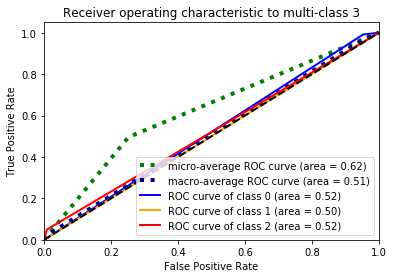

Accuracy for Split 4
0.5737704918032787
Confusion Matric for Split 4
Predicted    0  1  2  __all__
Actual                       
0          136  0  4      140
1            3  0  0        3
2           97  0  4      101
__all__    236  0  8      244
Precision, Recall, F Score for Split 4
(0.5376146151708808, 0.5737704918032787, 0.4454485236941726, None)


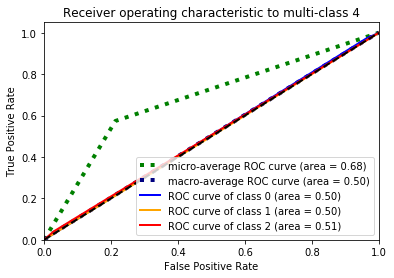

Accuracy for Split 5
0.4139344262295082
Confusion Matric for Split 5
Predicted    0  1   2  __all__
Actual                        
0           84  0   8       92
1           11  0   0       11
2          124  0  17      141
__all__    219  0  25      244
Precision, Recall, F Score for Split 5
(0.5375724230855604, 0.4139344262295082, 0.3220379806083223, None)


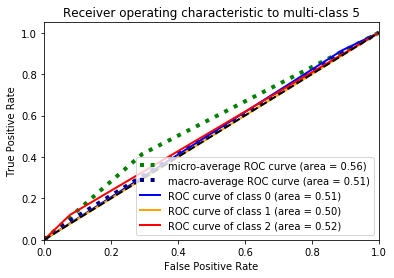

Accuracy for Split 6
0.6434426229508197
Confusion Matric for Split 6
Predicted    0  1  2  __all__
Actual                       
0          153  0  4      157
1            6  0  0        6
2           77  0  4       81
__all__    236  0  8      244
Precision, Recall, F Score for Split 6
(0.5831307307585439, 0.6434426229508197, 0.5308408757605114, None)


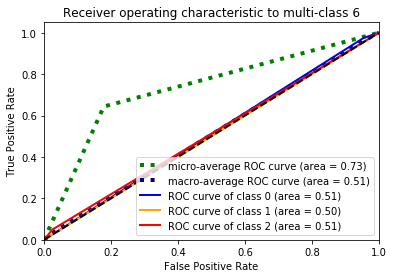

Accuracy for Split 7
0.610655737704918
Confusion Matric for Split 7
Predicted    0  1   2  __all__
Actual                        
0          147  0  10      157
1           10  0   0       10
2           75  0   2       77
__all__    232  0  12      244
Precision, Recall, F Score for Split 7
(0.46029418692293195, 0.610655737704918, 0.5004867698511423, None)


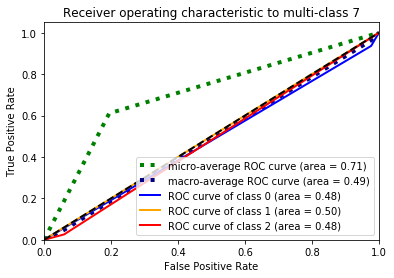

Accuracy for Split 8
0.7295081967213115
Confusion Matric for Split 8
Predicted    0  1  2  __all__
Actual                       
0          175  4  0      179
1            8  0  0        8
2           54  0  3       57
__all__    237  4  3      244
Precision, Recall, F Score for Split 8
(0.7752991630352079, 0.7295081967213115, 0.6405777112232031, None)


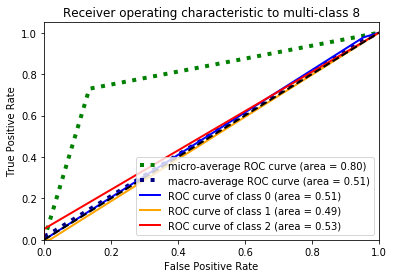

Accuracy for Split 9
0.6229508196721312
Confusion Matric for Split 9
Predicted    0  1  2  __all__
Actual                       
0          145  0  0      145
1           14  0  0       14
2           78  0  7       85
__all__    237  0  7      244
Precision, Recall, F Score for Split 9
(0.7119388531507228, 0.6229508196721312, 0.5041529370496282, None)


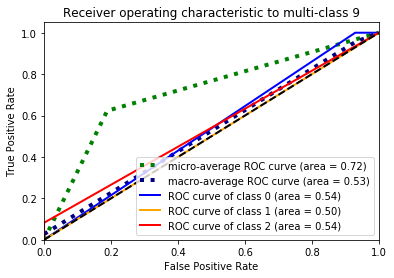

Accuracy for Split 10
0.5983606557377049
Confusion Matric for Split 10
Predicted    0  1   2  __all__
Actual                        
0          126  0   0      126
1            9  0   0        9
2           89  0  20      109
__all__    224  0  20      244
Precision, Recall, F Score for Split 10
(0.7371926229508197, 0.5983606557377049, 0.5103215148049307, None)


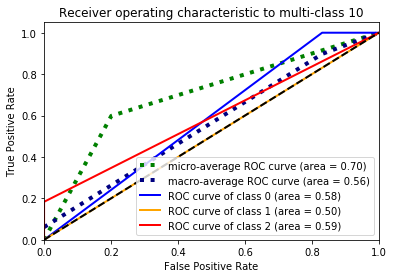

Accuracy =0.5801321512211441
Precision =0.6106165994350027
Recall =0.5801321512211441
F1 Score =0.4705869258593759
ROC AUC Score =0.5588296273259732


In [52]:


p=1
scores=[]
precisions=[]
recalls=[]
fscores=[]
clfsvmlinear1 = svm.SVC(C= 2.0, degree= 1, kernel= 'rbf')
for train_index, test_index in cv.split(train1):
    X_train, X_test = train1.iloc[train_index], train1.iloc[test_index]
    y_train, y_test = train_ys1.reindex(train_index), train_ys1.reindex(test_index).reset_index(drop=True)
    clfsvmlinear1.fit(X_train, y_train)
    print('Accuracy for Split '+str(p))
    print(clfsvmlinear1.score(X_test, y_test))
    scores.append(clfsvmlinear1.score(X_test, y_test))
    pred = clfsvmlinear1.predict(X_test)
    print('Confusion Matric for Split '+str(p))
    print(ConfusionMatrix(y_test, pred))
    precision,recall,fscore,support=precision_recall_fscore_support(y_test, pred, average='weighted')
    precisions.append(precision)
    recalls.append(recall)
    fscores.append(fscore)

    print('Precision, Recall, F Score for Split '+str(p))
    print(precision_recall_fscore_support(y_test, pred, average='weighted'))
    predbin = label_binarize(pred,classes=[0,1,2,])
    y_testbin = label_binarize(y_test,classes=[0,1,2,])
    n_classes = predbin.shape[1]
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_testbin[:, i], predbin[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    fpr["micro"], tpr["micro"], _ = roc_curve(y_testbin.ravel(), predbin.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='green', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    colors = cycle(['blue', 'orange', 'red'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, linewidth=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic to multi-class '+str(p))
    p+=1
    plt.legend(loc="lower right")
    plt.show()
    
    
acc = np.mean(scores)
# print('Scores ='+ str(scores))
print('Accuracy ='+ str(acc))
precisionavg = np.mean(precisions)
print('Precision ='+ str(precisionavg))
recallavg = np.mean(recalls)
print('Recall ='+ str(recallavg))
fscoreavg = np.mean(fscores)
print('F1 Score ='+ str(fscoreavg))
print('ROC AUC Score ='+ str(roc_auc["macro"]))


In [56]:

def Election(year):
    train = master.copy()
    train = train.loc[train['Year']!= int(year)]
    year_to_use = "result" + str(year)
    train_ys = train['result']

    test = master.copy()
    test = test.loc[test['Year']== int(year)]
    #Removing unnecessary columns from the training X data

    original_training_data = train
    original_test_data = test
    train = train.drop(columns=['id', 'PCON13CD', 'PCON13CDO', 'Constituencies', 'geometry', 'result','Year'])

    test_ys = test['result']
    test_ys=test_ys.to_numpy()

    #Removing unnecessary columns from the X test data
    test = test.drop(columns=['id', 'PCON13CD', 'PCON13CDO', 'Constituencies', 'geometry', 'result','Year'])
    # Initiating a Random Forest Classifier
    RF = RandomForestClassifier(n_estimators=1000)

    #Fitting the Classifier to the training Data
    RF.fit(train,train_ys)

    #Using the model to classify training data
    y_train_predictions = RF.predict(train)

    #Using the model to classify test data
    y_predictions = RF.predict(test)
    print(classification_report(test_ys, y_predictions, digits=5))

    precision,recall,fscore,support=precision_recall_fscore_support(test_ys, y_predictions, average='macro')
    
    
    
    
    predbin = label_binarize(y_predictions,classes=[0,1,2,])
    y_testbin = label_binarize(test_ys,classes=[0,1,2,])
    n_classes = predbin.shape[1]
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_testbin[:, i], predbin[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    fpr["micro"], tpr["micro"], _ = roc_curve(y_testbin.ravel(), predbin.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='green', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    colors = cycle(['blue', 'orange', 'red'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, linewidth=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic to multi-class ')
    plt.legend(loc="lower right")
    plt.show()
    
    print(str(year)+" Got training data accuracy of " + str(accuracy_score(y_train_predictions,train_ys)))
    print(str(year)+" Random forest achieved prediction accuracy " + str(accuracy_score(y_predictions, test_ys)))
    
    print(str(year)+" Random forest achieved precision " + str(precision))
    print(str(year)+" Random forest achieved recall " + str(recall))
    print(str(year)+" Random forest achieved fscore " + str(fscore))
    print(str(year)+" Random forest achieved ROC AUC Score "+ str(roc_auc["macro"]))
    print('\n')
    #Inserting the labels back into the training and test data dataframes
    original_training_data.insert(10,"RandomForest "+year,y_train_predictions)
    original_test_data.insert(10,"RandomForest "+year,y_predictions)
    
    print(ConfusionMatrix(test_ys, y_predictions))
    print('\n')
    # Plotting the Random Forest Classifications and the Actual Results
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#0087DC','#FAA61A','#E4003B'])
    original_test_data.plot(column='result', figsize=(20,10), cmap=cmap)
    plt.title(str(year) + " Election Result", fontsize=18)
    
    original_test_data.plot(column='RandomForest '+year, figsize=(20,10), cmap=cmap)
    plt.title(str(year) + " Election Prediction", fontsize=18)
    

    #Working out which constituencies have been incorrectly classified.
    missclassified = []
    resultpredictions = original_test_data['RandomForest '+year].values
    result = original_test_data['result'].values
    for i in range(original_test_data.shape[0]):
        if(resultpredictions[i] == result[i]):
            missclassified.append(1)
        else:
            missclassified.append(0)
    original_test_data.insert(0,"AccuratePrediction", missclassified)
    #Printing out which constituencies have been missclassified.

    constituencylist = original_test_data['Constituencies'].values
    partylist = original_test_data['result'].values

    print(str(year)+" Incorrectly classified constituencies were:")
    for i in range(len(constituencylist)):
        if(missclassified[i]==0):
            print(constituencylist[i])

    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['red','green'])        
    # Plot to highlight which constituencies have been missclassified
    original_test_data.plot(column='AccuratePrediction', figsize=(20,10),cmap=cmap)
    plt.title("Map of incorrectly classified seats, " + str(year), fontsize=18)
    plt.show()
    original_test_data['RandomForest '+year] = le.inverse_transform(original_test_data['RandomForest '+year])
    return original_test_data[['Constituencies','RandomForest '+year]].reset_index(drop=True)

              precision    recall  f1-score   support

           0    0.60952   0.98462   0.75294       130
           1    0.87500   0.23333   0.36842        30
           2    0.95862   0.68473   0.79885       203

    accuracy                        0.75482       363
   macro avg    0.81438   0.63423   0.64007       363
weighted avg    0.82669   0.75482   0.74684       363



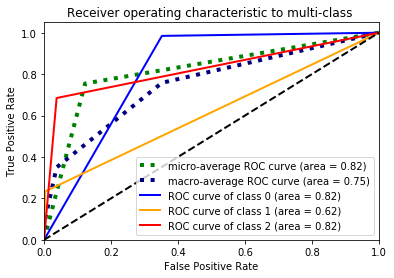

2005 Got training data accuracy of 1.0
2005 Random forest achieved prediction accuracy 0.7548209366391184
2005 Random forest achieved precision 0.8143814997263273
2005 Random forest achieved recall 0.6342259273293757
2005 Random forest achieved fscore 0.640070934604937
2005 Random forest achieved ROC AUC Score 0.7517072414188369


Predicted    0  1    2  __all__
Actual                         
0          128  1    1      130
1           18  7    5       30
2           64  0  139      203
__all__    210  8  145      363


2005 Incorrectly classified constituencies were:
Amber Valley
Battersea
Bedford
Berwick-upon-Tweed
Bolton West
Brigg and Goole
Bristol North West
Bristol West
Broxtowe
Burton
Bury North
Calder Valley
Cambridge
Cannock Chase
Carlisle
Chatham and Aylesford
Cheadle
Cheltenham
Chesterfield
City of Chester
Cleethorpes
Colchester
Colne Valley
Corby
Crawley
Crewe and Nantwich
Dartford
Dover
Dudley South
Eastbourne
Eastleigh
Erewash
Finchley and Golders Green
Gloucester
Great 

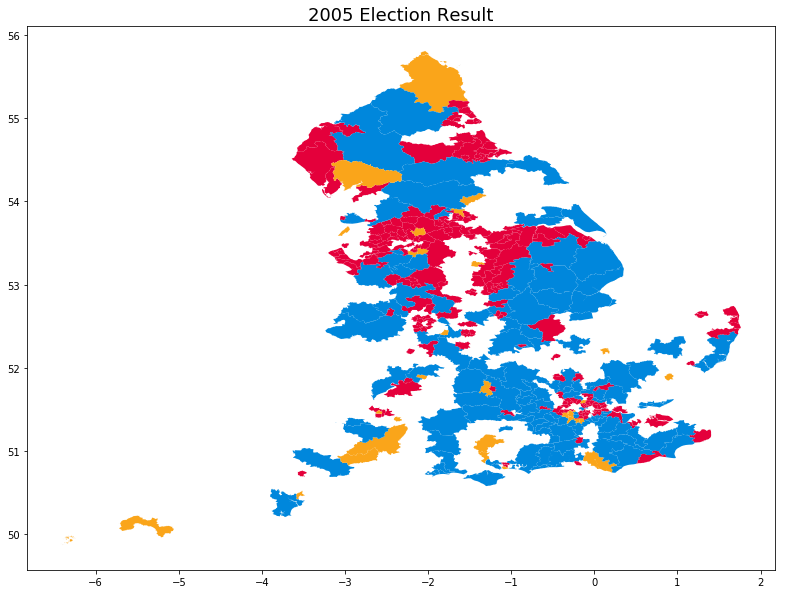

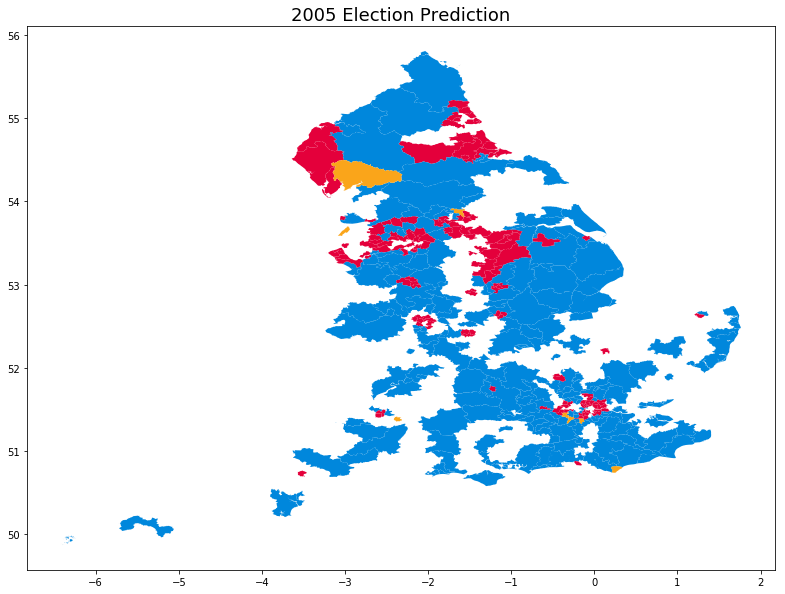

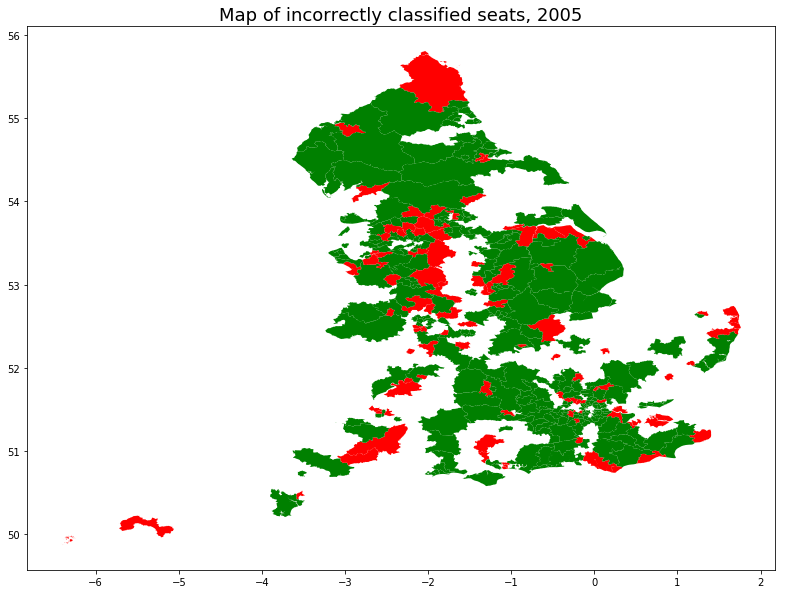

              precision    recall  f1-score   support

           0    0.90236   0.91156   0.90694       294
           1    0.85714   0.15000   0.25532        40
           2    0.82000   0.96471   0.88649       170

    accuracy                        0.86905       504
   macro avg    0.85983   0.67542   0.68291       504
weighted avg    0.87099   0.86905   0.84832       504



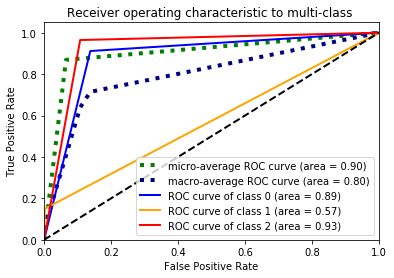

2010 Got training data accuracy of 1.0
2010 Random forest achieved prediction accuracy 0.8690476190476191
2010 Random forest achieved precision 0.8598332531665864
2010 Random forest achieved recall 0.6754235027344272
2010 Random forest achieved fscore 0.6829143432232319
2010 Random forest achieved ROC AUC Score 0.7963726110927543


Predicted    0  1    2  __all__
Actual                         
0          268  1   25      294
1           23  6   11       40
2            6  0  164      170
__all__    297  7  200      504


2010 Incorrectly classified constituencies were:
Battersea
Bedford
Bermondsey and Old Southwark
Berwick-upon-Tweed
Bolton West
Bradford East
Brent Central
Brentford and Isleworth
Bristol North West
Bristol West
Burnley
Bury North
Cambridge
Cheadle
Cheltenham
Chippenham
City of Chester
Colchester
Colne Valley
Copeland
Crewe and Nantwich
Croydon Central
Dewsbury
Ealing Central and Acton
Eastbourne
Eastleigh
Enfield North
Hazel Grove
High Peak
Hornsey and Wood Green
Hove

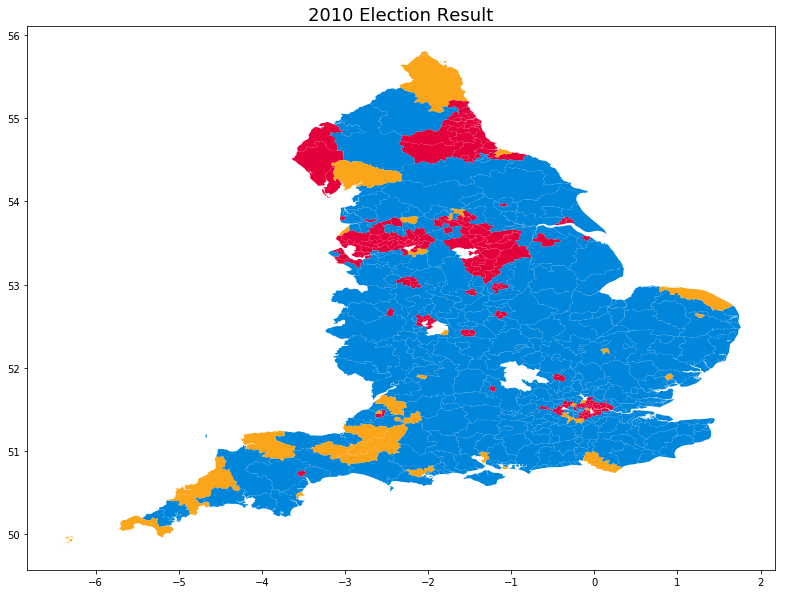

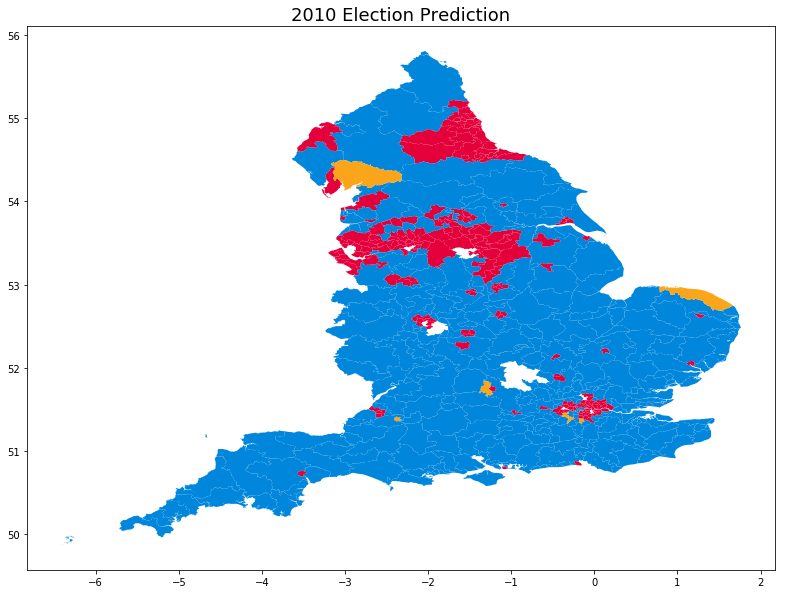

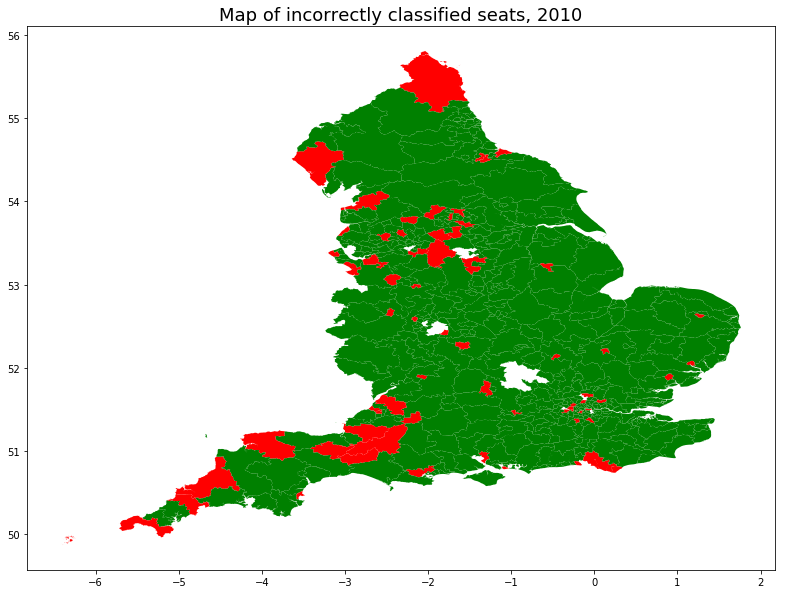

              precision    recall  f1-score   support

           0    0.99639   0.88179   0.93559       313
           1    0.19231   0.83333   0.31250         6
           2    0.90521   0.97949   0.94089       195

    accuracy                        0.91829       514
   macro avg    0.69797   0.89820   0.72966       514
weighted avg    0.95241   0.91829   0.93033       514



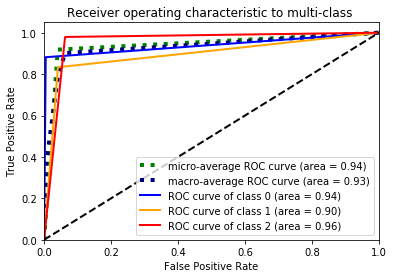

2015 Got training data accuracy of 1.0
2015 Random forest achieved prediction accuracy 0.9182879377431906
2015 Random forest achieved precision 0.6979702847155411
2015 Random forest achieved recall 0.8982032167335682
2015 Random forest achieved fscore 0.7296599732821241
2015 Random forest achieved ROC AUC Score 0.9309333363967565


Predicted    0   1    2  __all__
Actual                          
0          276  18   19      313
1            0   5    1        6
2            1   3  191      195
__all__    277  26  211      514


2015 Incorrectly classified constituencies were:
Bath
Battersea
Bedford
Bolton West
Brighton, Kemptown
Bristol North West
Bristol West
Bury North
Cambridge
Cheadle
Cheltenham
Colchester
Colne Valley
Derby North
Eastleigh
Enfield, Southgate
Hazel Grove
Hornsey and Wood Green
Ilford North
Ipswich
Keighley
Kingston and Surbiton
Lewes
Lincoln
Morley and Outwood
Oxford West and Abingdon
Plymouth, Sutton and Devonport
Portsmouth South
Reading East
Richmond Park
Sheffi

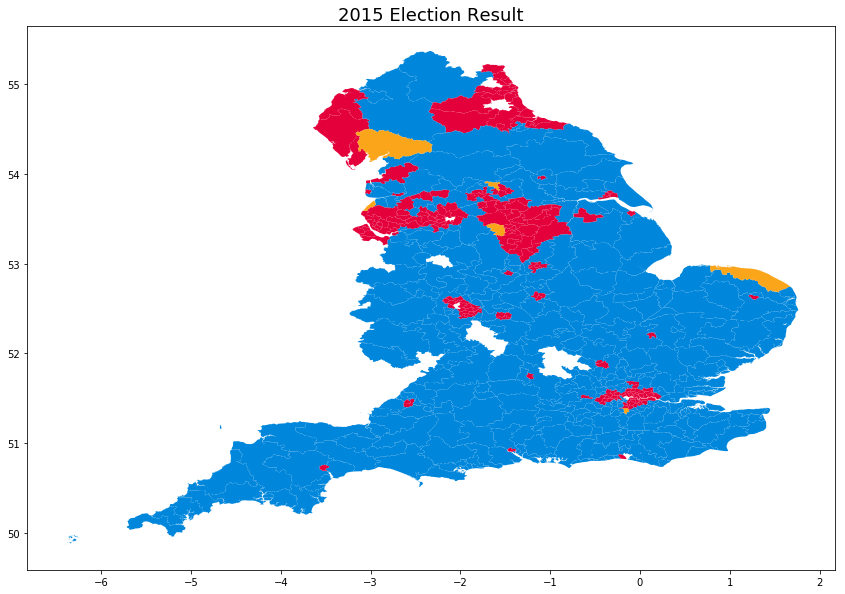

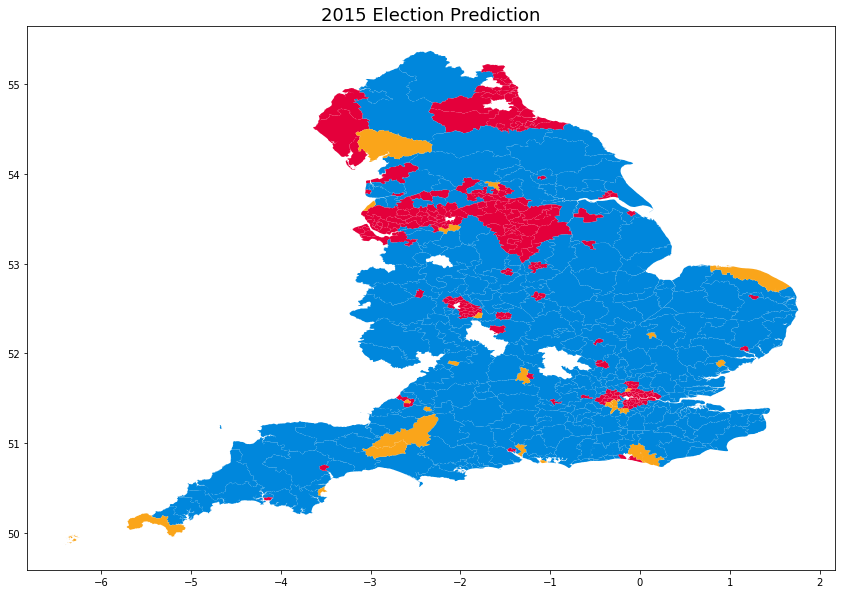

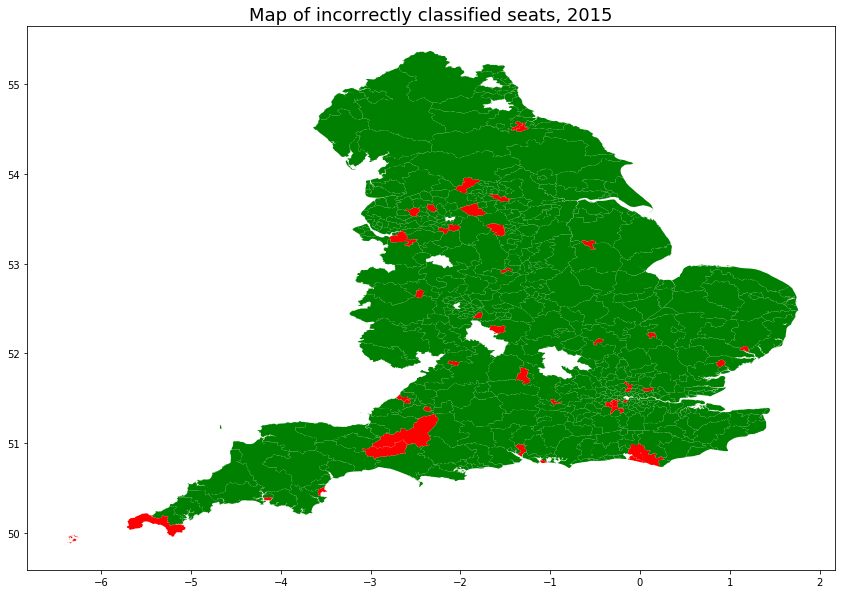

              precision    recall  f1-score   support

           0    0.86726   0.99324   0.92598       296
           1    0.75000   0.75000   0.75000         8
           2    0.99454   0.80531   0.88998       226

    accuracy                        0.90943       530
   macro avg    0.87060   0.84952   0.85532       530
weighted avg    0.91976   0.90943   0.90797       530



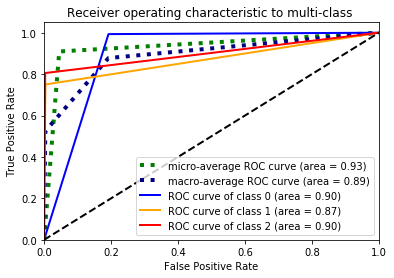

2017 Got training data accuracy of 1.0
2017 Random forest achieved prediction accuracy 0.909433962264151
2017 Random forest achieved precision 0.8705973854312749
2017 Random forest achieved recall 0.8495176592521725
2017 Random forest achieved fscore 0.8553199340302511
2017 Random forest achieved ROC AUC Score 0.8915207323566823


Predicted    0  1    2  __all__
Actual                         
0          294  1    1      296
1            2  6    0        8
2           43  1  182      226
__all__    339  8  183      530


2017 Incorrectly classified constituencies were:
Ashfield
Barrow and Furness
Bassetlaw
Birmingham, Northfield
Bishop Auckland
Blackpool South
Blyth Valley
Bolsover
Burnley
Bury North
Bury South
Colne Valley
Crewe and Nantwich
Croydon Central
Derby North
Dewsbury
Don Valley
Dudley North
Eastbourne
Gedling
Great Grimsby
High Peak
Hyndburn
Ipswich
Keighley
Kensington
Leeds North West
Leigh
Lincoln
Newcastle-under-Lyme
North Norfolk
North West Durham
Penistone and Stocksbr

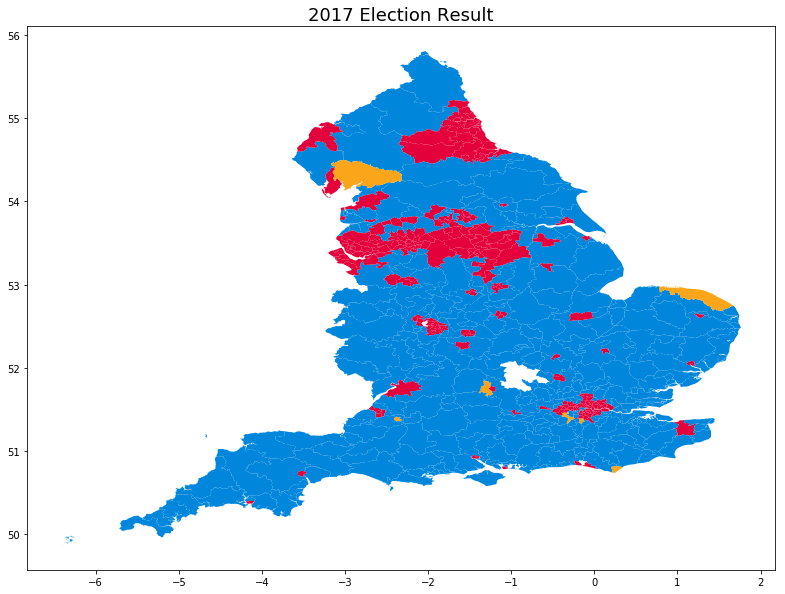

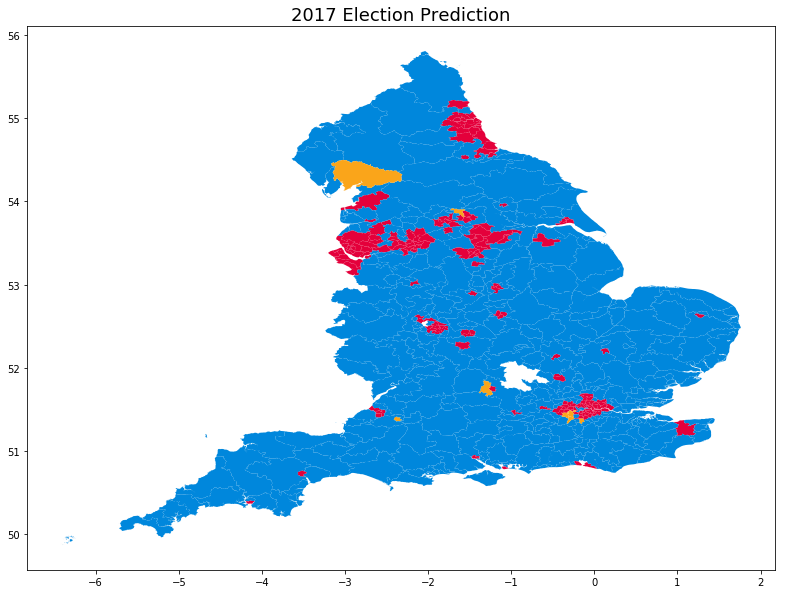

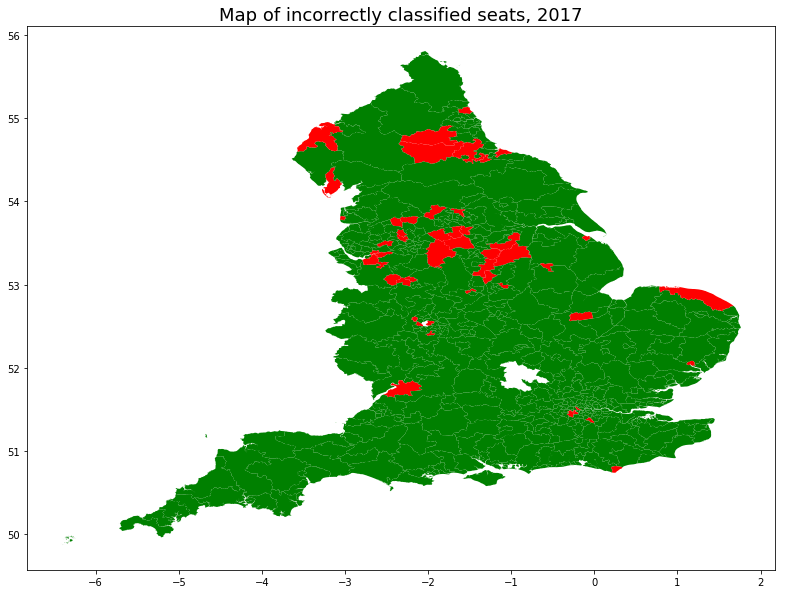

              precision    recall  f1-score   support

           0    0.95253   0.87500   0.91212       344
           1    0.37500   0.42857   0.40000         7
           2    0.80583   0.92737   0.86234       179

    accuracy                        0.88679       530
   macro avg    0.71112   0.74365   0.72482       530
weighted avg    0.89536   0.88679   0.88854       530



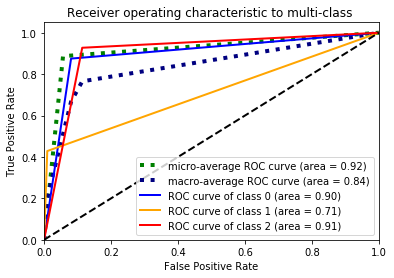

2019 Got training data accuracy of 1.0
2019 Random forest achieved prediction accuracy 0.8867924528301887
2019 Random forest achieved precision 0.7111189627626889
2019 Random forest achieved recall 0.7436485767491354
2019 Random forest achieved fscore 0.7248196248196249
2019 Random forest achieved ROC AUC Score 0.8377967042585772


Predicted    0  1    2  __all__
Actual                         
0          301  3   40      344
1            4  3    0        7
2           11  2  166      179
__all__    316  8  206      530


2019 Incorrectly classified constituencies were:
Ashfield
Barrow and Furness
Bassetlaw
Battersea
Bedford
Birmingham, Northfield
Bishop Auckland
Blackpool South
Blyth Valley
Bolsover
Bolton North East
Brighton, Kemptown
Bristol North West
Burnley
Bury South
Canterbury
Carshalton and Wallington
Copeland
Croydon Central
Darlington
Derby North
Dewsbury
Don Valley
Dudley North
Enfield, Southgate
Gedling
Great Grimsby
Heywood and Middleton
Hyndburn
Kingston and Surbiton
Lee

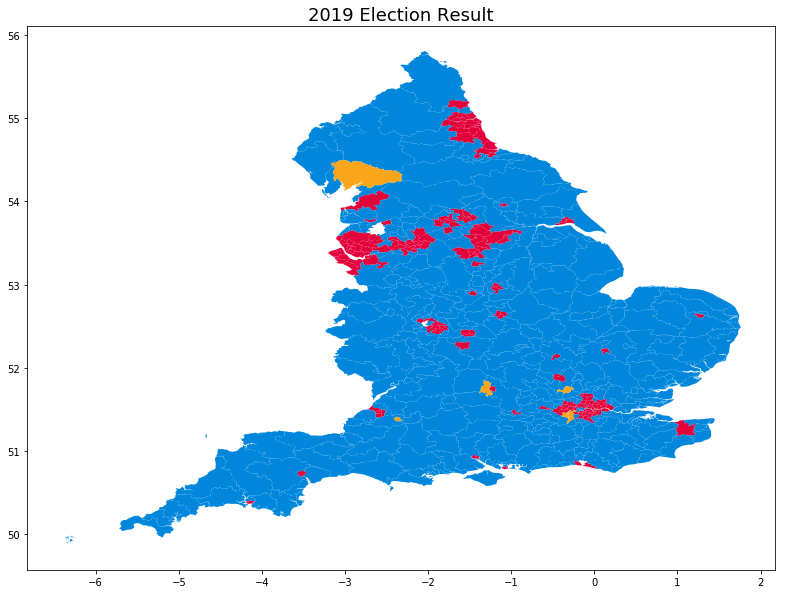

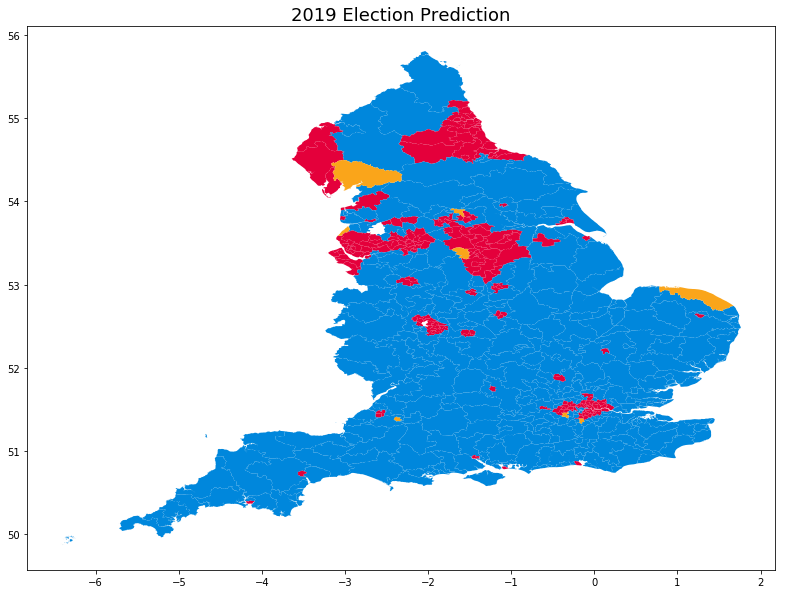

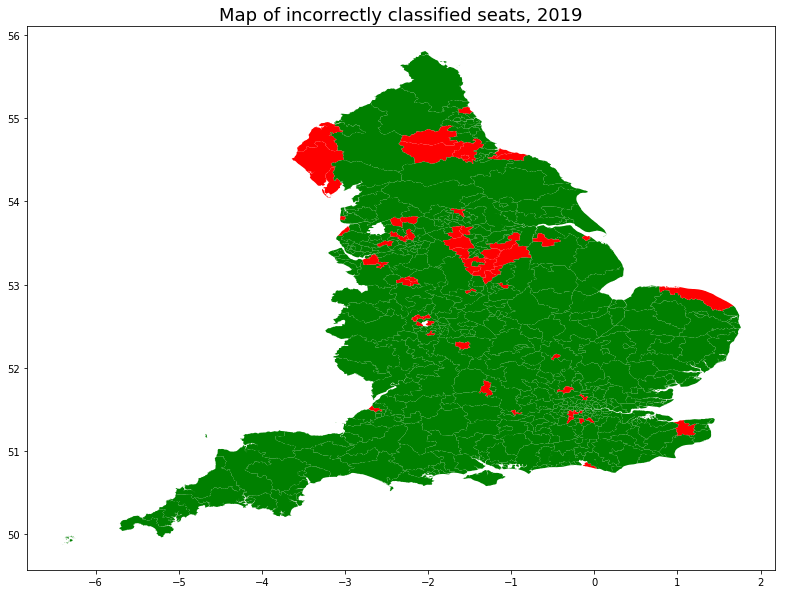

In [57]:
Years = ['2005','2010','2015','2017','2019']
all_results=[]
for i in Years:
    all_results.append(Election(i))

In [58]:
print(all_results)

[                        Constituencies RandomForest 2005
0                            Aldershot               Con
1             Altrincham and Sale West               Con
2                         Amber Valley               Con
3              Arundel and South Downs               Con
4                             Ashfield               Lab
5                              Ashford               Con
6                            Aylesbury               Con
7                              Banbury               Con
8                              Barking               Lab
9                     Barnsley Central               Lab
10                  Barrow and Furness               Lab
11                         Basingstoke               Con
12                           Bassetlaw               Lab
13                                Bath                LD
14                     Batley and Spen               Lab
15                           Battersea               Con
16                        Beac

In [61]:
sklearn.__version__

'0.21.0'

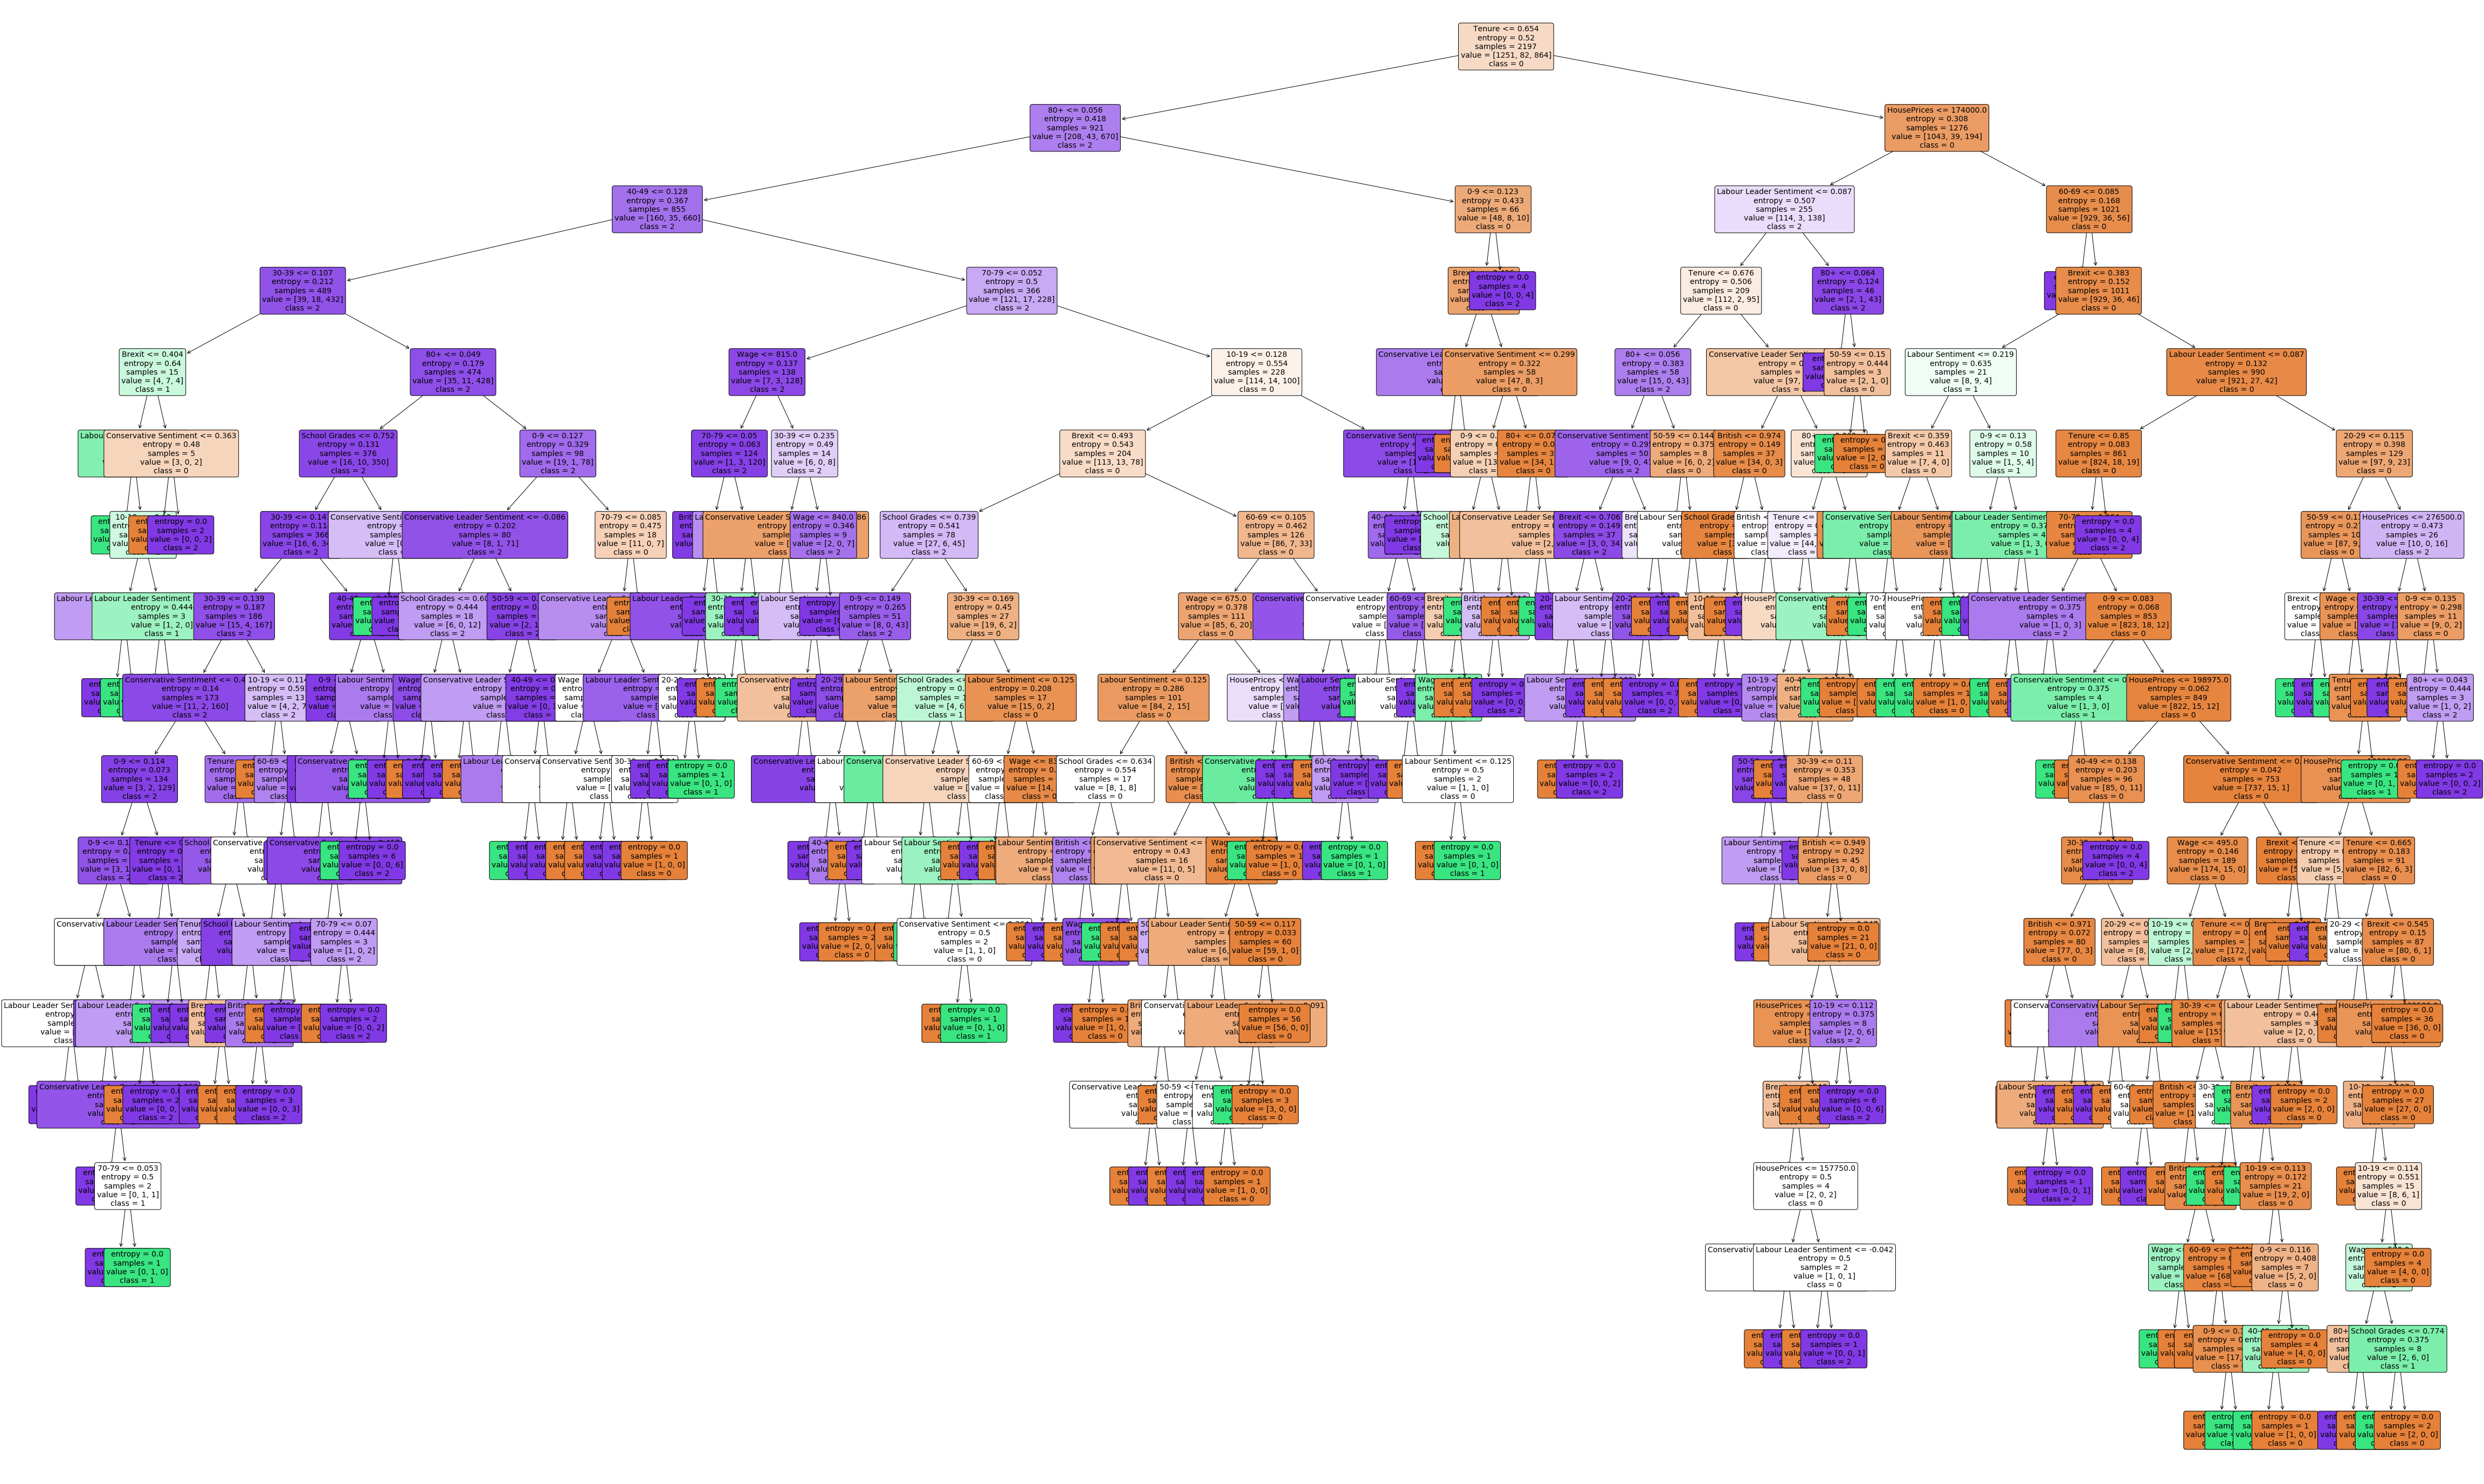

In [69]:
plt.figure(figsize=(80,50))
a = plot_tree(DTC1, 
              feature_names=train1.columns.values, 
              class_names=['0','1','2'], 
              filled=True, 
              rounded=True, 
              fontsize=14)

In [70]:
DTC1.tree_.node_count

485

485

485